<a href="https://colab.research.google.com/github/saharnazb/DataAnalytics/blob/master/PredictiveAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Data Science**
> ### Saharnaz Babaei-Balderlou
---



## Predictive Analytics: Regression
\\

**Reading for this session: [Chapter 3](https://www.statlearning.com/)**


<img src="https://images.squarespace-cdn.com/content/v1/5ff2adbe3fe4fe33db902812/8b373fbe-d1b4-4351-b803-0d3cd5bba1b0/ISLP_cover.png?format=750w" alt="picture" width="275" />

# **Recap**

<details>
  <summary>What is Supervised/Unsupervised Learning?</summary>

  Supervised Learning:
  * Observations are classified into predictor and response variables;
  * Primary goal is model relationships between the predictor and response variables;
  * Relationships can be used for prediction or for inference


  Unsupervised Learning:
  * Each observation is a vector of variables, but they are not classified as predictors and responses;
  * Primary goal is to find structure in the multivariable sata set;
  * One important technique is clustering, which seeks to find distinct groups of units or variables in the data set
</details>

<details>
  <summary>What is Predictive Analytics?</summary>
  Predictive Data Analytics encompasses the business and data process and computational models that enable a business to make data-driven decisions (AKA as supervised learning)
</details>

<details>
  <summary>Who uses Predictive Analytics?</summary>
  Everyone can use it in every industry with any size (business, medicine, astrophysics, public policy, …)
</details>

<details>
  <summary>Some example applications</summary>
  Price prediction, fraud detection, dosage prediction, risk assessment, propensity modelling, diagnosis, document classification, …
</details>

<details>
  <summary>What are common steps, workflows, and processes of most predictive analytics projects?</summary>
  goal, data, transform, analyze, deploy
</details>

<details>
  <summary>Why do we learn regression?</summary>
  prediction, exploring associations, extrapolation, causal inference
</details>





### **Steps of Data Storytelling**
<img src="https://assets-global.website-files.com/5dcc6210881da483dfe6cda8/61397b0b5afecb12a7127853_lego_datastory_rev1000.png" alt="picture" width="500" />

1. **Data collection:** You accumulate data and information on something to measure and understand its performance and behaviors.
2. **Data preparation:** (AKA data wrangling, data munging or data remediation) You convert a raw data into a usable form, retrieve, aggregate, merge, cleanse, organize, and transform the data so it's ready to be analyzed.
3. **Data visualization:** You visualize the data by creating graphic depictions of the informationto simplify monitoring and understanding what's happening.
4. **Data analysis:** You examine the data for insights tailored to the interest of a specific audience.
5. **Data storytelling:** You explain derived insights through engaging stories and visual elements to foster a connection and encourage transformative action. [1](https://www.effectivedatastorytelling.com/post/a-deeper-dive-into-lego-bricks-and-data-stories)

**Note:** *Ethical Considerations in Data Analytics*


> * In the ever-expanding field of data analytics, where the capacity for data gathering, retrieval, and analysis is growing, there is a critical need for maintaining ethical practices.
> * The pace of technological advancement often surpasses the speed at which regulations and corporate policies can adapt, leading to an ``ethics gap'' where the boundaries of legality and morality may diverge.
> * Data analysts must be vigilant about the ethical dimensions of their work, recognizing that the ability to perform certain actions doesn't automatically suggest that those actions are ethically justified.
> * Analysts are integral to the ethical dialogue and must uphold a high standard of ethics in their professional conduct, aligning their actions with established ethical norms.

### **Key Phrases/Concepts**

| Business/Statistics | Machine Learning | Definition |
|---------------------|------------------|------------|
| Regression/Classification; Prediction/Forcasting | Supervised Learning | A type of algorithm that learns from labeles training data, helping predict outcomes for unseen data. |
| Association/Pattern Identification | Unsupervised Learning |  |
| Variable | Feature | Any characteristic, number, or quantity that can be measured or quantified |
| Equation | Model | The system or algorithm that makes predictions based on data |
| Fitting  | Training | learning the relationship between features and outcomes on a given dataset |
| Method/Procedure | Algorithm | A set of rules or instructions given to a system to help it learn from data (OLS, MLE, etc) |
| Goodness-of-Fit | Accuracy | Proportion of correct predictions made by a model/ a measure of how well a model's predicted values match the observed (true) values |
| Outliers | Outliers | Data point that are significantly different from others in the dataset |






# **Motivating Examples**

Which of the following questions are considered as predictive analytics problems?

1. Can you forcast what would be the demand for the product next quarter?
2. A pharma company wants to determine if a particular disease phenotype is assosciated  with hypertension and type II diabetes!
3. From the mock test, can you predict what would be the expected SAT score of a student?
4. Bank executives want to identify if women customers with salary account would be interested in a car loan.
5. A real estate agent predicts the value of a house to go on the market.

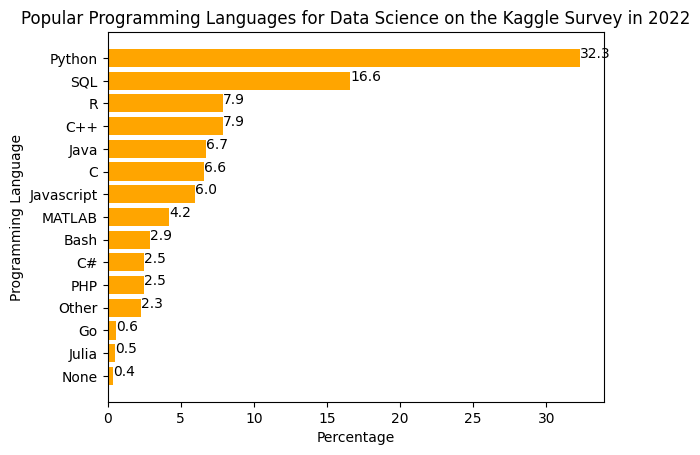

In [ ]:
import matplotlib.pyplot as plt

# Data from the image
languages = ['Python', 'SQL', 'R', 'C++', 'Java', 'C', 'Javascript', 'MATLAB', 'Bash', 'C#', 'PHP', 'Other', 'Go', 'Julia', 'None']
usage = [32.3, 16.6, 7.9, 7.9, 6.7, 6.6, 6.0, 4.2, 2.9, 2.5, 2.5, 2.3, 0.6, 0.5, 0.4]

# Create a horizontal bar chart
plt.barh(languages[::-1], usage[::-1], color='orange')  # Reverse the lists to match the order in the image

# Set the title and labels
plt.title('Popular Programming Languages for Data Science on the Kaggle Survey in 2022')
plt.xlabel('Percentage')
plt.ylabel('Programming Language')

# Add the data labels
for index, value in enumerate(usage[::-1]):
    plt.text(value, index, str(value))

# Show the plot
plt.show()

# **House Value Prediction: Boston Data**

We may wish to construct a model that predicts median value (`mdev`) based on the other variables in the dataset.

In [ ]:
# Import required libraries or packages
import numpy as np # a library for numerical Python
import pandas as pd
from matplotlib.pyplot import subplots
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

!pip install ISLP
from ISLP import load_data
from ISLP.models import(ModelSpec as MS, summarize, poly)

In [ ]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

# **List of Variables:**
'crim': per capita crime rate by town

'zn': proportion of residential land zoned for lots over 25,000 sq. ft.

'indus': proportion of non-retail business acres per town

'chas': Charles River dummy variable (=1 if tract bounds river; 0 otherwise)

'nox': Nitrogen Oxides concentration (parts per 10 million)

'rm': average number of rooms per dwelling

'age': proportion of owner-occupied units built prior to 1940

'dis': weighted mean of distances to five Boston employment centers

'rad': index of accessibility to radial highways

'tax': full-value property-tax rate per $10,000

'ptratio': pupil-teacher ratio by town

'lstat': Proportion of population that is lower status

'medv': median value of owner-occupied homes in $1000s

Let's assign `medv` as the *response variable* and the other variables as *predictor variables*.
* This model could be used to **predict** future (or unobserved) responses based on the predictors
> * If built a new suburb with a set of predictors, what would the model predict to be the median value of homes in the new suburb?

* Some models can also be used for inference to understand the relationship between the response and the predictors.
> * If we reduced the pollution level in a particular suburb by half its current amount, what would the effect be on median values?
> * If we added access to the radial highways, hat would the model estimate the effect to be the median value of homes in the suburb?


\
# **Simple Linear Regression (SLR)**

SLR is a way for predicting a response $Y$ on the basis of a single predictor variable $X$.
* $Y$ could be numeric, binary/categorical (coded as integers)

Easily expandable to Multiple Linear Regression where there exist multiple predictors $X_i$.

We model a linear relationship as
\begin{equation}
\hat{Y} = \hat{\beta_{0}} + \hat{\beta_{1}}X
\end{equation}

* We often say that we are regressing $Y$ onto $X$.

In equation (1), $\hat{\beta_{0}}$ and $\hat{\beta_{1}}$ represent the intercept and the slope in the linear model, respectively.

Once we have used our **training data** to produce estimates $\hat{\beta_{0}}$ and $\hat{\beta_{1}}$ for the model coefficients, we can predict future house values on the basis of a particular value of predictor variables. More on this to come.

# **Estimating the Cofficients**

We can use equation (1) to make predictions, but we need to "fit the model" and estimate the coefficients.

We investivate the Boston data set, which records medv (median house value) for 506 neighborhoods around Boston.
What types of exploratory data analysis can we do?

* histogram
* barplot
* scatterplot
* a map of Boston colored with a scale of average home price by neighborhood.

## **Explore the data**

Text(0.5, 1.0, 'Exploring the Data')

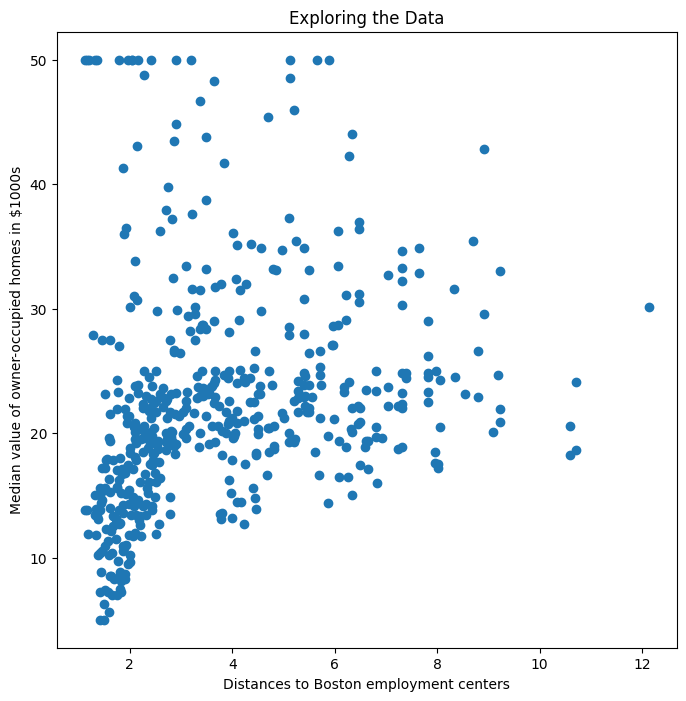

In [ ]:
fig, ax = subplots(figsize=(8, 8))
ax.scatter(Boston['dis'], Boston['medv'])
ax.set_xlabel("Distances to Boston employment centers")
ax.set_ylabel("Median value of owner-occupied homes in $1000s")
ax.set_title("Exploring the Data")
#fig.savefig("medv_dis_Scat", dpi=400)

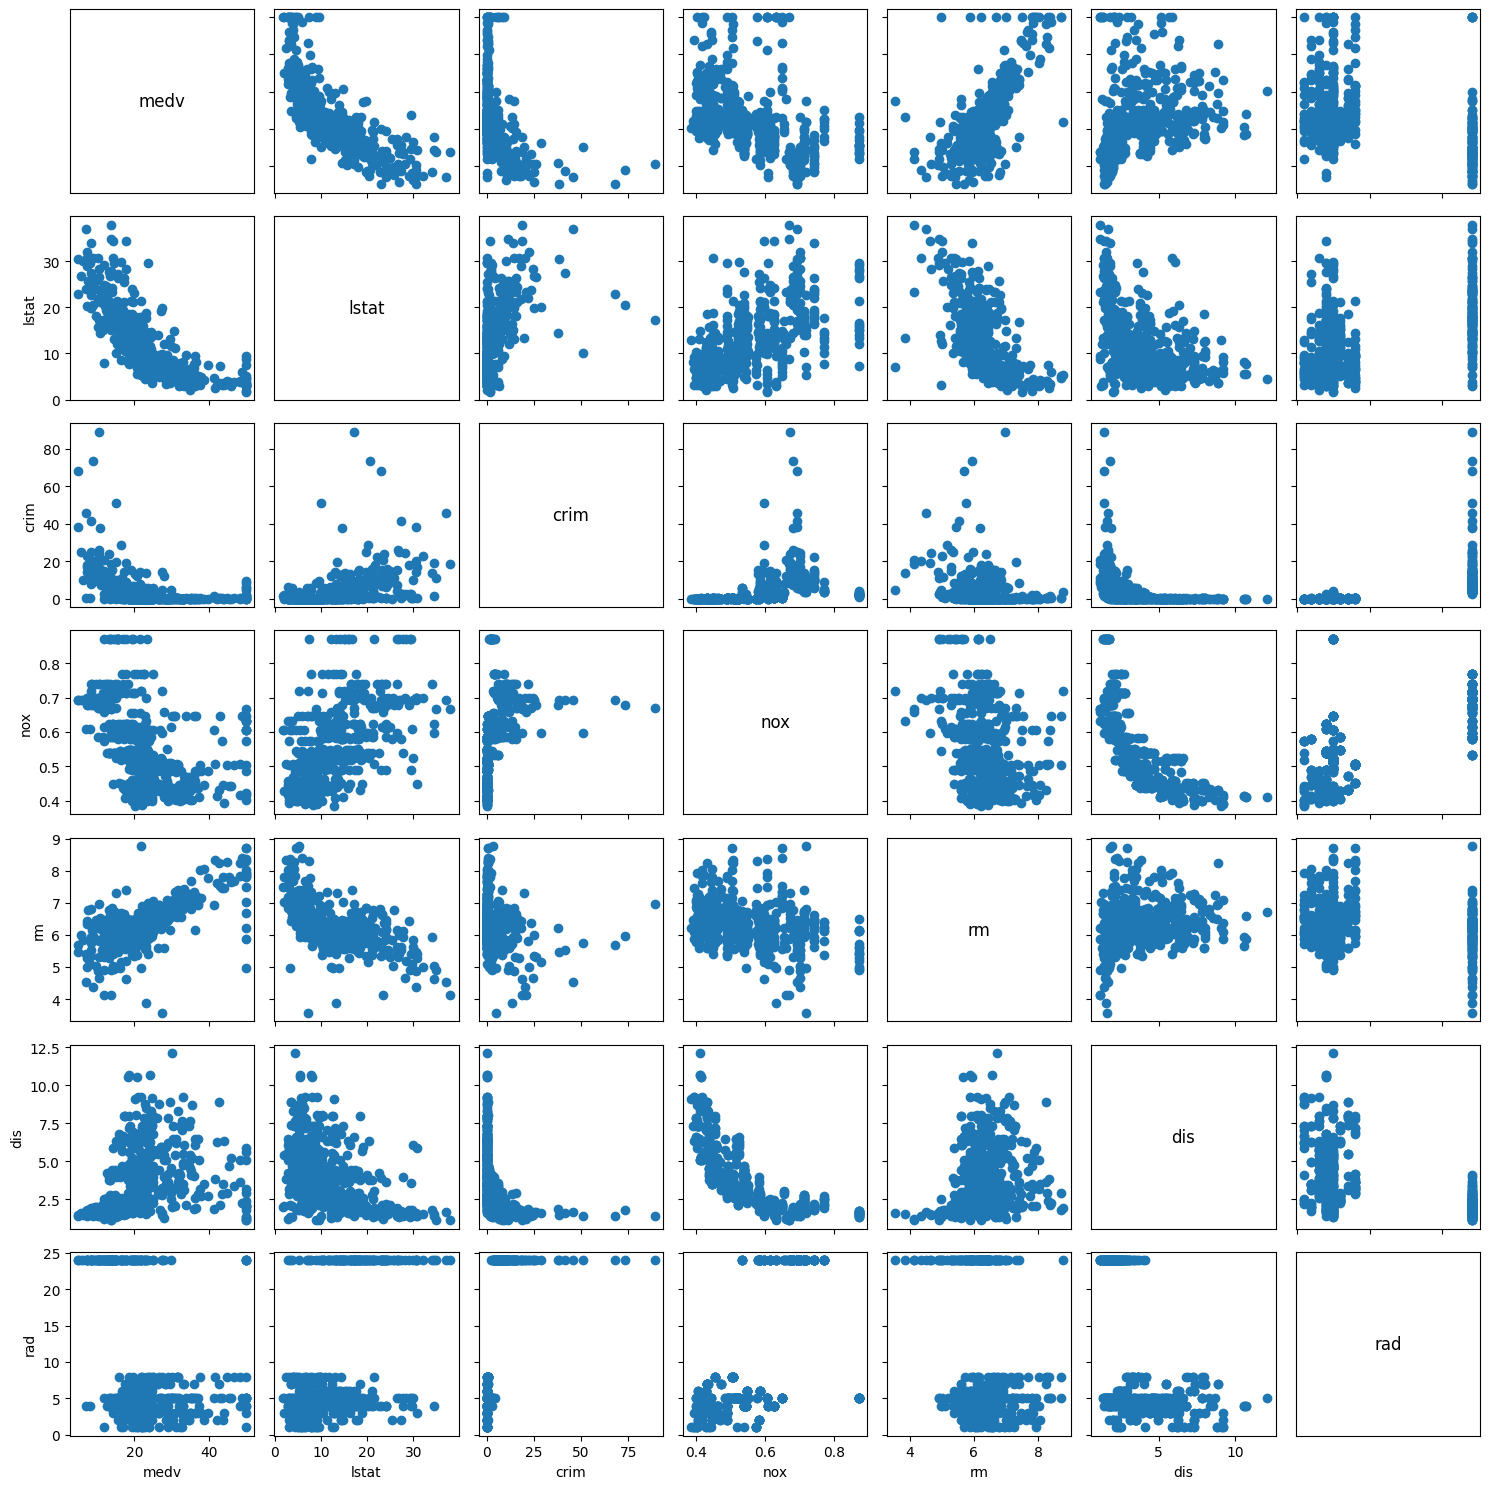

In [ ]:
variables = ['medv', 'lstat', 'crim', 'nox', 'rm', 'dis', 'rad']
n = len(variables)

fig, axs = subplots(nrows=n, ncols=n, figsize=(15, 15))  # Adjust the figsize to fit your screen

# Iterate over rows
for i in range(n):
    # Iterate over columns
    for j in range(n):
        # If we're on the diagonal, we write the variable name
        if i == j:
            axs[i, j].text(0.5, 0.5, variables[i], horizontalalignment='center', verticalalignment='center', fontsize=12)
            axs[i, j].set_xticks([])
            axs[i, j].set_yticks([])
        # If we're not on the diagonal, we create a scatter plot
        else:
            axs[i, j].scatter(Boston[variables[j]], Boston[variables[i]])
            if i < n - 1:  # Hide x-axis labels for all but the bottom plots
                axs[i, j].set_xticklabels([])
            if j > 0:  # Hide y-axis labels for all but the first column plots
                axs[i, j].set_yticklabels([])
            if j == 0:  # Only set y-label for the first column
                axs[i, j].set_ylabel(variables[i])
            if i == n - 1:  # Only set x-label for the bottom row
                axs[i, j].set_xlabel(variables[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

\
# **Estimating the Coefficients**
Let $\hat{y_i} = \hat{\beta_0} + \hat{\beta_1}x_i$ be the prediction of $Y$ based on the $i^{th}$ value of $X$.

* *Goal:* estimate the $\hat{\beta_0}$ (aka intercept) and $\hat{\beta_0}$ (aka slope) such that the resulting line goes through "right in the middle" of the data points.
Define $e_i = y_i - \hat{y_i}$ known as the $i^{th}$ residual, or the error where $y_i$ is the actual value of the response variable, and $\hat{y_i}$ is the model's prediction.

The Sum of Squared Residiuals (SSR) is defined as

\begin{equation}
\begin{aligned}
RSS &= e^2_1 + \dots + e^2_n \\
&= \Sigma_{i=1}^{n}(y_i - \hat{\beta_0}\hat{\beta_1}x_i)^2
\end{aligned}
\end{equation}

Using calculus, one can show that the minimizing values are

$$\hat{\beta_1} = \frac{\Sigma_{i=1}^n (x_i - \bar x)(y_i - \bar y)}{\Sigma_{i=1}^{n} (x_i - \bar x)}$$

$$\hat \beta_0 = \bar y - \hat \beta_1 \bar x$$


# **References**
[1] https://www.effectivedatastorytelling.com/post/a-deeper-dive-into-lego-bricks-and-data-stories